### Anjali Aggarwal

#             "Breast cancer diagnosis using cell nucleus characterstics"

# Tasks:
#### 1) Build a logistic regression model with LASSO for variable selection. With lambda = 0.01 and lambda = 0.5
##### - what are the features selected separately.Which lambda gives you simpler model? Which of these two models perform better on the testing set you hold out from the training process? What performance metrics are you using?
- For lasso with lambda 0.01, three features were selected - RadiusW, PeriW,CPpointW
- For lasso with lambda 0.5 , twenty two features were selected - RadiusM, TextM, PeriM, AreaM, SmoothM, ConcaveM, CPpointM, FracDimM, RadiusSE, PeriSE, AreaSE, CompactSE, SymSE, FracDimSE, RadiusW, TextW, PeriW, AreaW, SmoothW, ConcaveW, CPpointW, SymW
- Model with lambda 0.01 gives simpler model (three features only) But model with lambda 0.5 performed better on test data.
###### Performance matrics for model with lambda 0.01
- accuracy- 0.82
- pricision - 0.86
- recall - 0.82
- F1-score - 0.80
###### Performance matrics for model with lambda 0.01
- accuracy- 0.98
- pricision - 0.98
- recall - 0.98
- F1-score- 0.98


#### 2) In the model you trained in Task 1) 
###### which has better performance, what are the accuracy, recall, and precision? What probability threshold you are using when you calculate these performance metrics?
- Model with lambda 0.5 performed better on test data. Accuracy, recall and pricision are 0.98. This model used default 0.5 threshold.


#### 3) If you were told that the cost of misclassifying a malignant patient as benign is 100,000 USD, and the cost of misclassifying a benign patient as malignant is 10, 000 USD, and there is no cost of subjects accurately classified by the model.
###### what are the costs when you set the probability threshold as 0.3, 0.5, 0.7? Which probability threshold gives you the lowest cost?
- cost when threshold 0.3 - 340000 USD
- cost when threshold 0.5 - 310000 USD
- cost when threshold 0.7 - 600000 USD
- probability threshold 0.5 gave lowest cost (310000$) because there is less false negative or type II error (misclassifying a malignant patient as benign) and less false positive or type I error (misclassifying a benign patient as malignant)



In [1]:
#import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# loading the data in panda dataframe
filename = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
cancer_df = pd.read_csv(filename)

In [3]:
#checking first 5 rows of the data
cancer_df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [4]:
# changing the features name according to information provided by the dataset at UCI repositiory
cancer_df.columns = ['ID', 'Diagnosis','RadiusM', 'TextM', 'PeriM', 'AreaM', 'SmoothM', 'CompactM', 'ConcaveM', 'CPpointM', 'SymM', 'FracDimM','RadiusSE', 'TextSE', 'PeriSE', 'AreaSE', 'SmoothSE', 'CompactSE', 'ConcaveSE', 'CPpointSE', 'SymSE', 'FracDimSE', 'RadiusW', 'TextW', 'PeriW', 'AreaW', 'SmoothW', 'CompactW', 'ConcaveW', 'CPpointW', 'SymW', 'FracDimW']

In [5]:
#checking again if columns name has been changed
cancer_df.head()

,ID,Diagnosis,RadiusM,TextM,PeriM,AreaM,SmoothM,CompactM,ConcaveM,CPpointM,...,RadiusW,TextW,PeriW,AreaW,SmoothW,CompactW,ConcaveW,CPpointW,SymW,FracDimW
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [6]:
cancer_df.isnull().values.any()#checking if there is any missing value in the data set

False

In [7]:
print(cancer_df.shape)
print(cancer_df.dtypes)

(568, 32)
ID             int64
Diagnosis     object
RadiusM      float64
TextM        float64
PeriM        float64
AreaM        float64
SmoothM      float64
CompactM     float64
ConcaveM     float64
CPpointM     float64
SymM         float64
FracDimM     float64
RadiusSE     float64
TextSE       float64
PeriSE       float64
AreaSE       float64
SmoothSE     float64
CompactSE    float64
ConcaveSE    float64
CPpointSE    float64
SymSE        float64
FracDimSE    float64
RadiusW      float64
TextW        float64
PeriW        float64
AreaW        float64
SmoothW      float64
CompactW     float64
ConcaveW     float64
CPpointW     float64
SymW         float64
FracDimW     float64
dtype: object


In [8]:
cancer_df.drop('ID', axis=1, inplace=True) #removing the first column "ID" which is not useful for the prediction

In [9]:
cancer_df.loc[:, 'Diagnosis'].value_counts()# checking the total values for the two types of cancer

B    357
M    211
Name: Diagnosis, dtype: int64

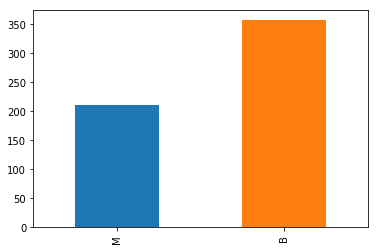

In [10]:
cancer_df['Diagnosis'].value_counts().sort_values().plot.bar()

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cancer_df.loc[:, "Diagnosis"] = labelencoder.fit_transform(cancer_df.loc[:, "Diagnosis"])

In [12]:
cancer_df.columns

Index(['Diagnosis', 'RadiusM', 'TextM', 'PeriM', 'AreaM', 'SmoothM',
       'CompactM', 'ConcaveM', 'CPpointM', 'SymM', 'FracDimM', 'RadiusSE',
       'TextSE', 'PeriSE', 'AreaSE', 'SmoothSE', 'CompactSE', 'ConcaveSE',
       'CPpointSE', 'SymSE', 'FracDimSE', 'RadiusW', 'TextW', 'PeriW', 'AreaW',
       'SmoothW', 'CompactW', 'ConcaveW', 'CPpointW', 'SymW', 'FracDimW'],
      dtype='object')

##  Data scaling and train-test split

In [13]:
X = cancer_df.drop('Diagnosis', axis =1)

In [14]:
y = cancer_df['Diagnosis']

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X_scale = sc.fit_transform(X)
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std
X_scale = scale(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale,y, test_size=.3,random_state=42)


## Logistic Regression with LASSO
### Lambda = 0.01

In [17]:
print(X_test.columns)
from sklearn.linear_model import LogisticRegression
clf_a = LogisticRegression(C=0.01, penalty='l1', tol=0.01, solver='saga')#lambda = 0.01
clf_a.fit(X_train, y_train)
print(clf_a.coef_)
print(clf_a.intercept_)
y_pred_a = clf_a.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf_a.score(X_test, y_test)))
confusion_matrix_a = confusion_matrix(y_test, y_pred_a)
print(confusion_matrix_a)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_a))


Index(['RadiusM', 'TextM', 'PeriM', 'AreaM', 'SmoothM', 'CompactM', 'ConcaveM',
       'CPpointM', 'SymM', 'FracDimM', 'RadiusSE', 'TextSE', 'PeriSE',
       'AreaSE', 'SmoothSE', 'CompactSE', 'ConcaveSE', 'CPpointSE', 'SymSE',
       'FracDimSE', 'RadiusW', 'TextW', 'PeriW', 'AreaW', 'SmoothW',
       'CompactW', 'ConcaveW', 'CPpointW', 'SymW', 'FracDimW'],
      dtype='object')
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.09677117 0.         0.18069157 0.
  0.         0.         0.         0.33776935 0.         0.        ]]
[-0.59831891]
Accuracy of logistic regression classifier on test set: 0.82
[[103   0]
 [ 31  37]]
             precision    recall  f1-score   support

          0       0.77      1.00      0.87       103
          1       1.00      0.54      0.70        68

avg / total       0.86      0.82      0.80      

## Logistic regression with lambda 0.5

In [18]:
print(X_test.columns)
from sklearn.linear_model import LogisticRegression
clf_b = LogisticRegression(C=0.5, penalty='l1', tol=0.01, solver='saga')#lambda = 0.5
clf_b.fit(X_train, y_train)
print(clf_b.coef_)
print(clf_b.intercept_)
y_pred_b = clf_b.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf_b.score(X_test, y_test)))
confusion_matrix_b = confusion_matrix(y_test, y_pred_b)
print(confusion_matrix_b)
print(classification_report(y_test, y_pred_b))

Index(['RadiusM', 'TextM', 'PeriM', 'AreaM', 'SmoothM', 'CompactM', 'ConcaveM',
       'CPpointM', 'SymM', 'FracDimM', 'RadiusSE', 'TextSE', 'PeriSE',
       'AreaSE', 'SmoothSE', 'CompactSE', 'ConcaveSE', 'CPpointSE', 'SymSE',
       'FracDimSE', 'RadiusW', 'TextW', 'PeriW', 'AreaW', 'SmoothW',
       'CompactW', 'ConcaveW', 'CPpointW', 'SymW', 'FracDimW'],
      dtype='object')
[[ 0.50763507  0.4156369   0.48484159  0.51209465  0.09347955  0.
   0.31175392  0.51359099  0.         -0.25499118  0.64280012  0.
   0.3994309   0.4786748   0.         -0.17353238  0.          0.
  -0.05949915 -0.20137674  0.76519398  0.85171792  0.68194885  0.70661288
   0.840083    0.          0.47905386  0.63586837  0.48713623  0.        ]]
[-0.45016734]
Accuracy of logistic regression classifier on test set: 0.98
[[102   1]
 [  3  65]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       103
          1       0.98      0.96      0.97        68

avg / tota

### Performance matrics for different thresholds using lasso-logistic-regression model with lambda = 0.5

### if threshold = 0.3

0.958523700742433
             precision    recall  f1-score   support

          0       0.97      0.96      0.97       103
          1       0.94      0.96      0.95        68

avg / total       0.96      0.96      0.96       171



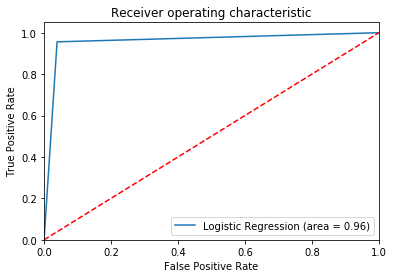

[[99  4]
 [ 3 65]]


In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
y_score = (clf_b.predict_proba(X_test)[:,1]>= 0.3).astype(bool)
roc_auc_score = roc_auc_score(y_test, y_score)
print (roc_auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print(classification_report(y_test, y_score))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print(confusion_matrix(y_test,y_score))

In [22]:
## false negative cost 100,000 and false positive cost 10,000
cost = (3*100000)+(4*10000)# from confusion matrix 3 cases are FN and 4 cases are FP
print('Cost for misclassifing cancer :' + str(cost))

Cost for misclassifing cancer :340000


## if threshold is 0.5

0.9730868075385495
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       103
          1       0.98      0.96      0.97        68

avg / total       0.98      0.98      0.98       171



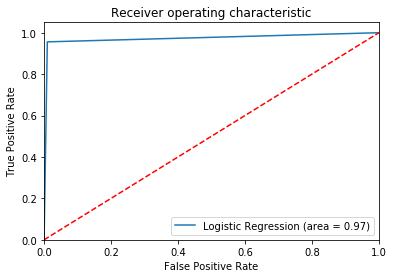

[[102   1]
 [  3  65]]


In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
y_score = (clf_b.predict_proba(X_test)[:,1]>= 0.5).astype(bool)
roc_auc_score = roc_auc_score(y_test, y_score)
print (roc_auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print(classification_report(y_test, y_score))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print(confusion_matrix(y_test,y_score))

In [24]:
#false negative cost 100,000 and false positive cost 10,000
cost = (3*100000)+(1*10000)# from confusion matrix 3 cases are FN and 1 cases are FP
print('Cost for misclassifing cancer :' + str(cost))

Cost for misclassifing cancer :310000


## if threshold is 0.7

0.9558823529411764
             precision    recall  f1-score   support

          0       0.94      1.00      0.97       103
          1       1.00      0.91      0.95        68

avg / total       0.97      0.96      0.96       171



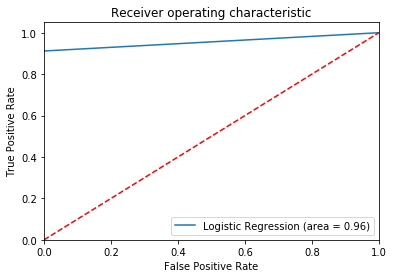

[[103   0]
 [  6  62]]


In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
y_score = (clf_b.predict_proba(X_test)[:,1]>= 0.7).astype(bool)
roc_auc_score = roc_auc_score(y_test, y_score)
print (roc_auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print(classification_report(y_test, y_score))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print(confusion_matrix(y_test,y_score))

In [26]:
## false negative cost 100,000 and false positive cost 10,000
cost = (6*100000)+(0*10000)# from confusion matrix 6 cases are FN and 0 cases are FP
print('Cost for misclassifing cancer :' + str(cost))

Cost for misclassifing cancer :600000
